<a href="https://colab.research.google.com/github/ZackWongAPO/Colab/blob/main/Curve_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#二次函数曲线拟合

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
import numpy
import matplotlib.pyplot as plt

>调节输入值定义域对拟合结果有很大影响，主要影响的是收敛速度，由于SGD不能自适应收敛速度，这就导致一旦输入定义域在折线变化的区间之外，需要很多epoch才能达到输入定义域在折线变化内的效果，学习速率同样也和输入数据的尺度相关

##train_on_batch与fit之间的区别

##

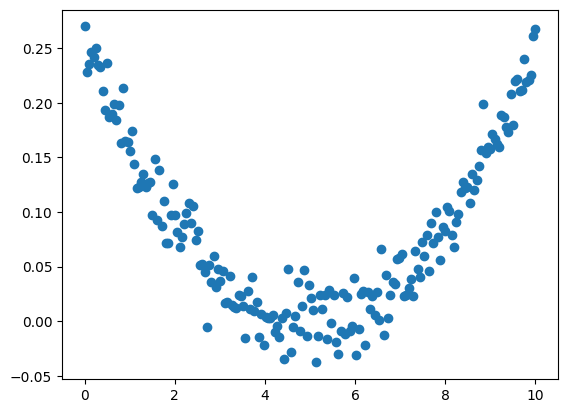

0
[[-0.05160341  0.28039458 -0.3648218  -0.23766531  0.03323916  0.72835743
   0.272431    0.5266332   0.09232967  0.700613  ]] [-1.3082425e-05  7.5342987e-06 -8.2278493e-06  1.1788088e-05
 -1.3315820e-05  3.8731700e-06  6.4383598e-06  5.0710009e-06
 -4.9711102e-06 -9.0231936e-07]
1
[[-0.05165965  0.280421   -0.3648476  -0.23762178  0.03318162  0.728365
   0.27245378  0.52664596  0.0923087   0.7006112 ]] [-2.6152151e-05  1.5063815e-05 -1.6448885e-05  2.3568595e-05
 -2.6619271e-05  7.7444638e-06  1.2872879e-05  1.0139339e-05
 -9.9366698e-06 -1.8032640e-06]
2
[[-0.05171583  0.28044736 -0.36487338 -0.23757829  0.03312415  0.7283726
   0.27247655  0.5266587   0.09228776  0.7006094 ]] [-3.92091970e-05  2.25885542e-05 -2.46631171e-05  3.53415271e-05
 -3.99103701e-05  1.16138835e-05  1.93035630e-05  1.52050161e-05
 -1.48966874e-05 -2.70283658e-06]
3
[[-0.05177194  0.28047374 -0.36489913 -0.23753482  0.03306673  0.72838014
   0.27249932  0.52667147  0.09226684  0.7006076 ]] [-5.2253585e-05  3.

KeyboardInterrupt: 

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.02,data.shape)
y=numpy.square(data/10)+noise
data = data+5

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.001)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


>对学习率的敏感程度：sigmoid<Tanh<ReLU

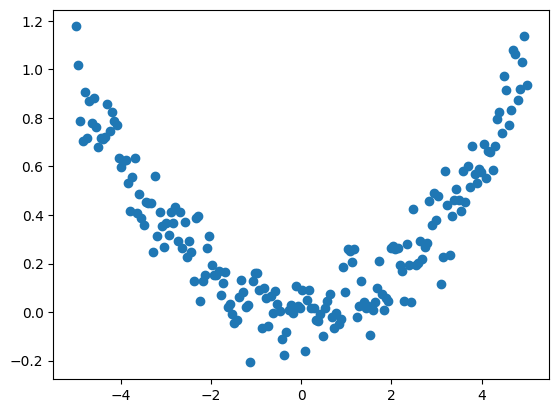

0
[[-0.11471935 -0.18551964 -0.25580814  0.5672832  -0.09450211  0.39781132
   0.23519956  0.11684669  0.3342055  -0.07778156]] [ 0.00589255 -0.0056091   0.01147461 -0.01557115 -0.00203998  0.02446009
 -0.0151957   0.01838272 -0.0112661  -0.03111896]
1
[[-0.11522647 -0.18543941 -0.2564032   0.567339   -0.09458523  0.39763364
   0.23570636  0.11586268  0.33442074 -0.07649886]] [ 0.009291   -0.00637201  0.01779877 -0.02230725 -0.00148395  0.03824326
 -0.01989235  0.02627113 -0.01473762 -0.04065417]
2
[[-0.11607056 -0.18539421 -0.25747532  0.5675834  -0.09479997  0.3972697
   0.23642677  0.11438689  0.33474553 -0.074758  ]] [ 0.01088643 -0.00650644  0.02150234 -0.02670862 -0.00108783  0.04750488
 -0.02208682  0.02973017 -0.01649874 -0.04419491]
3
[[-0.11696594 -0.18537816 -0.2586445   0.56785864 -0.09505159  0.3970835
   0.23714648  0.11291563  0.33506605 -0.07307035]] [ 0.01177011 -0.00653634  0.02423237 -0.0303935  -0.00085768  0.05512151
 -0.02354703  0.03158179 -0.01778016 -0.04583383

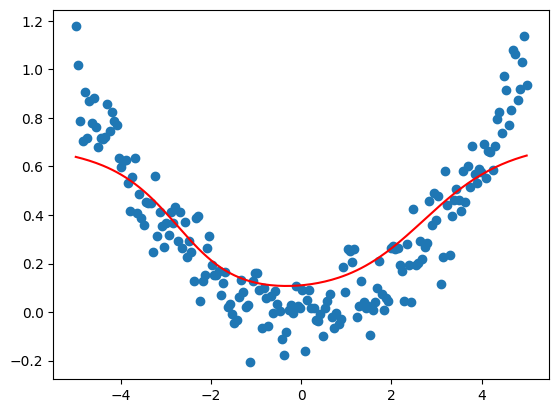

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=numpy.square(data/5)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=1.5)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


>对定义域匹配的敏感程度：ReLU<sigmoid<Tanh

>对值域匹配的敏感程度：ReLU<Tanh<sigmoid
>>sigmoid娇生惯养，但凡它的值域与输出值域不匹配，那就是寄，因此不可以放在输出层

>由以上分析可以看出，其实ReLU才是最好的拟合方式，但是由于对学习率要求过于严格，与其他那俩配合不了，并且输出还是直线，对曲线拟合而言误差太大

##尝试组合不同的激活函数

###与线性激活函数配合

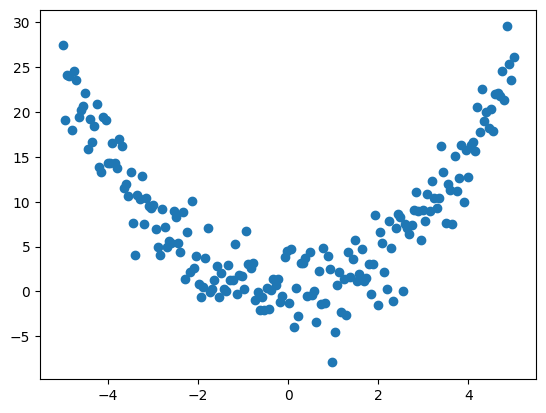

流式输出内容被截断，只能显示最后 5000 行内容。
  -0.4998725  -0.6374666 ]] [ 0.1523696  -0.64882356 -0.00789747 -0.21611704 -0.56864434  1.4099097
  0.22040014  0.7190413 ]
751
[[-0.505502    0.46177045  0.4432666   0.4723349   0.5130725   0.6657388
  -0.47344372 -0.5922811 ]] [ 0.15526022 -0.65485007 -0.00570484 -0.21577172 -0.57374185  1.4246979
  0.22570385  0.72977465]
752
[[-0.5429907   0.49099445  0.47056046  0.50874966  0.5515132   0.7117602
  -0.4996885  -0.6370282 ]] [ 0.15259618 -0.6496711  -0.00772547 -0.21615385 -0.5692766   1.4118723
  0.22089586  0.7201262 ]
753
[[-0.5056671   0.46199855  0.44347477  0.47253606  0.5132356   0.6658608
  -0.4736031  -0.59236205]] [ 0.15551235 -0.65561825 -0.00560304 -0.21583594 -0.5743698   1.4263859
  0.226187    0.73073715]
754
[[-0.5426636   0.49087375  0.47040716  0.5084602   0.5511824   0.71128005
  -0.49953237 -0.63656884]] [ 0.15287152 -0.65049726 -0.0075837  -0.21619976 -0.56994236  1.4137385
  0.22143172  0.72119933]
755
[[-0.5056926   0.46215978  0.4

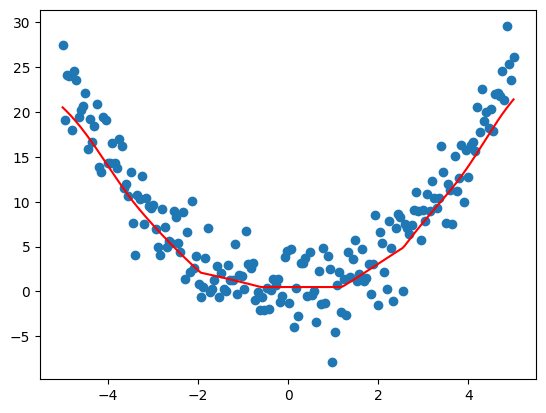

In [3]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,3,data.shape)
y=numpy.square(data)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.003)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(2000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

In [6]:
loss = model.evaluate(data, y, verbose=0)
print("Loss:", loss)
y_pred = model.predict(data)
std_dev = numpy.std(y - y_pred)
print("Standard Deviation between predicted and true values:", std_dev)

Loss: 8.496962547302246
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Standard Deviation between predicted and true values: 10.288071903834295
